# 7. 什么是GARCH模型？ 

## 目录
1. ARCH
2. GARCH

ARCH(1)模型就是上式没有方差项，

$ \epsilon_t=\sigma_tw_t$


$ \sigma_t^2=\alpha_0+\alpha_1\epsilon_{t-1}^2$

所以ARCH其实是特殊的GARCH。

而GARCH模型，简单的来理解就是将ARMA模型应用到残差平方和上。来看个GARCH(1，1)的例子。

$ \epsilon_t=\sigma_tw_t$

$ \sigma_t^2=\alpha_0+\alpha_1\epsilon_{t-1}^2+\beta_1\sigma_{t-1}^2$

其中$w_t$~$IID(0,1)$

In [1]:
from scipy import  stats
import statsmodels.api as sm  # 统计相关的库
import numpy as np
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt

import arch  # 条件异方差模型相关的库

In [2]:
data=ts.get_k_data('000001', start='2016-01-01', end='2016-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')

data=data['close'].diff()[1:]

t = sm.tsa.stattools.adfuller(data)  # ADF检验
print "p-value:   ",t[1]

p-value:    0.006009307564


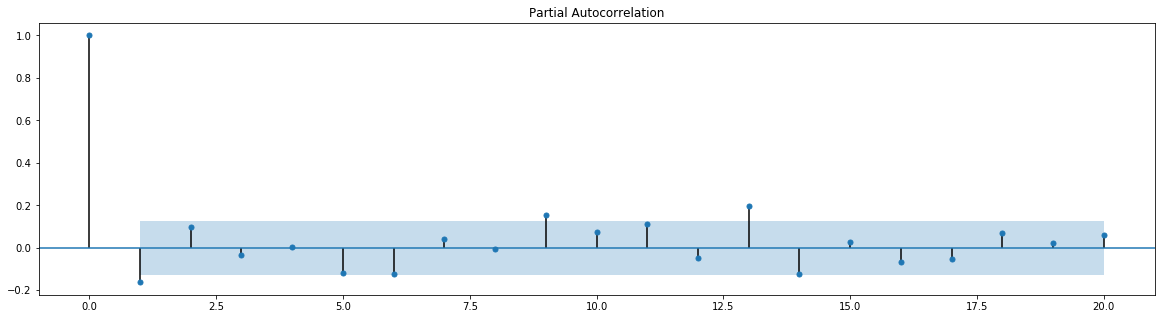

In [3]:
fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(data,lags = 20,ax=ax1)
plt.show()

In [4]:
order = (13,0)
model = sm.tsa.ARMA(data,order).fit()

D:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


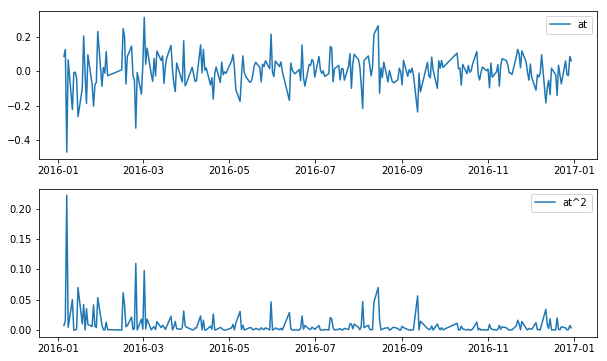

In [5]:
at = data -  model.fittedvalues
at2 = np.square(at)
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(at,label = 'at')
plt.legend()
plt.subplot(212)
plt.plot(at2,label='at^2')
plt.legend(loc=0)
plt.show()

In [6]:
m = 25 # 我们检验25个自相关系数
acf,q,p = sm.tsa.acf(at2,nlags=m,qstat=True)  ## 计算自相关系数 及p-value
out = np.c_[range(1,26), acf[1:], q, p]
output=pd.DataFrame(out, columns=['lag', "AC", "Q", "P-value"])
output = output.set_index('lag')
output

,AC,Q,P-value
lag,,,
1.0,0.014345,0.050625,0.821980
2.0,0.118677,3.529925,0.171193
3.0,-0.011064,3.560289,0.313027
4.0,0.098516,5.977886,0.200806
5.0,-0.041359,6.405776,0.268712
6.0,0.195397,15.996641,0.013772
7.0,0.164832,22.850651,0.001810
8.0,0.086483,24.745471,0.001717
9.0,-0.030288,24.978876,0.002995


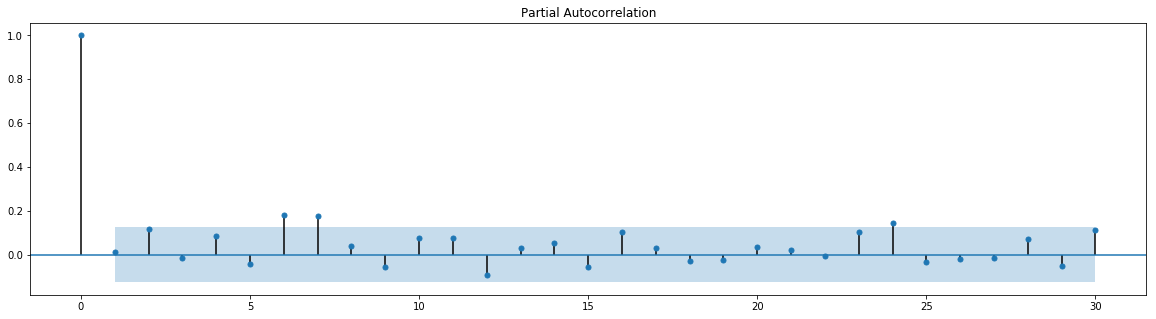

In [7]:
fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(at2,lags = 30,ax=ax1)
plt.show()

In [8]:
train = data[:-10]
test = data[-10:]
am = arch.arch_model(train,mean='AR',lags=13,vol='ARCH',p=7) 
res = am.fit()

Iteration:      1,   Func. Count:     24,   Neg. LLF: -237.333813474
Iteration:      2,   Func. Count:     52,   Neg. LLF: -237.40402314
Iteration:      3,   Func. Count:     80,   Neg. LLF: -238.726791833
Iteration:      4,   Func. Count:    107,   Neg. LLF: -239.213597268
Iteration:      5,   Func. Count:    133,   Neg. LLF: -239.727352484
Iteration:      6,   Func. Count:    158,   Neg. LLF: -241.907188423
Iteration:      7,   Func. Count:    183,   Neg. LLF: -245.362215313
Iteration:      8,   Func. Count:    209,   Neg. LLF: -246.478708982
Iteration:      9,   Func. Count:    236,   Neg. LLF: -246.729412765
Iteration:     10,   Func. Count:    262,   Neg. LLF: -246.848960921
Iteration:     11,   Func. Count:    288,   Neg. LLF: -247.131319672
Iteration:     12,   Func. Count:    313,   Neg. LLF: -248.003884498
Iteration:     13,   Func. Count:    338,   Neg. LLF: -248.531255524
Iteration:     14,   Func. Count:    364,   Neg. LLF: -248.664429881
Iteration:     15,   Func. Count:  

In [9]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.150
Mean Model:                        AR   Adj. R-squared:                  0.096
Vol Model:                       ARCH   Log-Likelihood:                252.413
Distribution:                  Normal   AIC:                          -460.826
Method:            Maximum Likelihood   BIC:                          -386.166
                                        No. Observations:                  220
Date:                Sat, Jun 24 2017   Df Residuals:                      198
Time:                        12:00:52   Df Model:                           22
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const       1.4927e-03  1.496e-02  9.975e-02      0.921 [-2.784e-02,3.082e-02]
close[1]       -0.0850      0.123     -0.690      0.490      [ -0.326,  0.156]
close[2]        0.0340      0.131      0.260      0.795      [ -0.222,  0.290]
close[3]   -4.5421e-04  6.748e-02 -6.732e-03      0.995      [ -0.133,  0.132]
close[4]       -0.0406      0.140     -0.291      0.771      [ -0.314,  0.233]
close[5]       -0.1139      0.199     -0.572      0.567      [ -0.504,  0.276]
close[6]       -0.0561      0.296     -0.190      0.850      [ -0.636,  0.524]
close[7]   -8.9847e-03      0.521 -1.724e-02      0.986      [ -1.031,  1.013]
close[8]        0.0203  8.903e-02      0.228      0.819      [ -0.154,  0.195]
close[9]        0.1843      0.279      0.661      0.509      [ -0.362,  0.731]
close[10]       0.0917      0.107      0.861      0.389      [ -0.117,  0.301]
close[11]       0.0745      0.200      0.373      0.709      [ -0.317,  0.466]
close[12]      -0.0221      0.136     -0.162      0.871      [ -0.289,  0.245]
close[13]       0.2135      0.159      1.340      0.180   [-9.885e-02,  0.526]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.9941e-03  4.416e-03      0.678      0.498 [-5.662e-03,1.165e-02]
alpha[1]       0.0000      0.167      0.000      1.000      [ -0.328,  0.328]
alpha[2]       0.0445  6.753e-02      0.659      0.510   [-8.783e-02,  0.177]
alpha[3]   1.3422e-10      0.404  3.319e-10      1.000      [ -0.793,  0.793]
alpha[4]       0.0000      1.217      0.000      1.000      [ -2.385,  2.385]
alpha[5]       0.0000      0.510      0.000      1.000      [ -1.000,  1.000]
alpha[6]       0.0173      0.674  2.560e-02      0.980      [ -1.305,  1.339]
alpha[7]       0.5781      1.489      0.388      0.698      [ -2.340,  3.496]
=============================================================================

Covariance estimator: robust
"""

In [10]:
res.params

Const        1.492690e-03
close[1]    -8.497512e-02
close[2]     3.395028e-02
close[3]    -4.542113e-04
close[4]    -4.056921e-02
close[5]    -1.138923e-01
close[6]    -5.611123e-02
close[7]    -8.984683e-03
close[8]     2.034156e-02
close[9]     1.843336e-01
close[10]    9.172263e-02
close[11]    7.449631e-02
close[12]   -2.210782e-02
close[13]    2.135335e-01
omega        2.994095e-03
alpha[1]     0.000000e+00
alpha[2]     4.451640e-02
alpha[3]     1.342153e-10
alpha[4]     0.000000e+00
alpha[5]     0.000000e+00
alpha[6]     1.726823e-02
alpha[7]     5.781235e-01
Name: params, dtype: float64

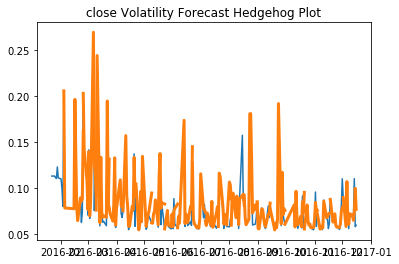

In [11]:
res.hedgehog_plot()

In [12]:
len(train)
# print train

233

In [13]:
res = am.fit(last_obs = '2016-12-13', update_freq=5)
forecasts = res.forecast()
initial_sigma = np.sqrt(forecasts.variance.iloc[-1])
print initial_sigma

Iteration:      5,   Func. Count:    132,   Neg. LLF: -235.533186098
Iteration:     10,   Func. Count:    261,   Neg. LLF: -243.173427506
Iteration:     15,   Func. Count:    390,   Neg. LLF: -245.420475321
Iteration:     20,   Func. Count:    518,   Neg. LLF: -246.607871516
Iteration:     25,   Func. Count:    643,   Neg. LLF: -249.174290765
Iteration:     30,   Func. Count:    764,   Neg. LLF: -249.410030623
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -249.410065573
            Iterations: 32
            Function evaluations: 813
            Gradient evaluations: 32
h.1    0.062172
Name: 2016-12-16 00:00:00, dtype: float64


In [14]:
data_simulate = am.simulate(res.params, 10)
print data_simulate
print test
data_simulate.index = test.index

model_simulate = pd.concat([data_simulate,test], axis=1)
model_simulate.rename(columns={'close': 'test_returns'}, inplace=True)
print model_simulate

       data    errors  volatility
0 -0.117839 -0.108352    0.055003
1  0.004387 -0.023033    0.060510
2 -0.153155 -0.130864    0.117530
3  0.006810  0.006785    0.053571
4  0.033508  0.001612    0.072745
5 -0.066154 -0.075206    0.083653
6 -0.092489 -0.115089    0.092654
7  0.133107  0.117837    0.102224
8 -0.126163 -0.163520    0.063645
9  0.107995  0.105644    0.119326
date
2016-12-19   -0.05
2016-12-20   -0.09
2016-12-21    0.05
2016-12-22   -0.02
2016-12-23   -0.06
2016-12-26    0.04
2016-12-27   -0.04
2016-12-28   -0.02
2016-12-29    0.02
2016-12-30    0.02
Name: close, dtype: float64
                data    errors  volatility  test_returns
date                                                    
2016-12-19 -0.117839 -0.108352    0.055003         -0.05
2016-12-20  0.004387 -0.023033    0.060510         -0.09
2016-12-21 -0.153155 -0.130864    0.117530          0.05
2016-12-22  0.006810  0.006785    0.053571         -0.02
2016-12-23  0.033508  0.001612    0.072745         -0.06
2016

In [15]:
import sys

index = data.index
start_loc = 0
end_loc = np.where(index >= '2016-11-22')[0].min()
forecasts = {}
for i in range(20):
    sys.stdout.write('.')
    sys.stdout.flush()
    res = am.fit(first_obs=i, last_obs=i+end_loc, disp='off')
    temp = res.forecast(horizon=3).variance
    fcast = temp.iloc[i+end_loc-1]
    forecasts[fcast.name] = fcast

print(pd.DataFrame(forecasts).T)

....................                 h.1       h.2       h.3
2016-11-21  0.004188  0.004543  0.003063
2016-11-22  0.004409  0.003784  0.002633
2016-11-23  0.003788  0.002917  0.002557
2016-11-24  0.002837  0.002330  0.003395
2016-11-25  0.002480  0.004677  0.005781
2016-11-28  0.004713  0.005517  0.012883
2016-11-29  0.005286  0.012840  0.008346
2016-11-30  0.012798  0.008056  0.003896
2016-12-01  0.007608  0.003110  0.013394
2016-12-02  0.003116  0.012727  0.003215
2016-12-05  0.012885  0.003893  0.003568
2016-12-06  0.003739  0.002645  0.004953
2016-12-07  0.002636  0.004696  0.004329
2016-12-08  0.004464  0.004330  0.004466
2016-12-09  0.004365  0.004618  0.011191
2016-12-12  0.004326  0.013453  0.002545
2016-12-13  0.012995  0.002704  0.003397
2016-12-14  0.002718  0.002977  0.003158
2016-12-15  0.003369  0.005520  0.009061
2016-12-16  0.005302  0.008707  0.018891


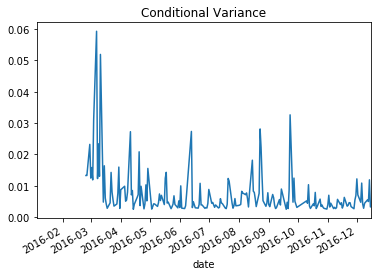

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
(res.conditional_volatility['2016'] ** 2.0).plot(ax=ax, title='Conditional Variance')
plt.show()

In [18]:
pre = res.forecast()
print pre.variance.iloc[-1:]

                 h.1
date                
2016-12-16  0.005302


In [19]:
train_G = data[:-10]
test_G = data[-10:]
am_G = arch.arch_model(train,mean='AR',lags=13,vol='GARCH', p=7) 
res_G = am.fit()

Iteration:      1,   Func. Count:     24,   Neg. LLF: -237.333813474
Iteration:      2,   Func. Count:     52,   Neg. LLF: -237.40402314
Iteration:      3,   Func. Count:     80,   Neg. LLF: -238.726791833
Iteration:      4,   Func. Count:    107,   Neg. LLF: -239.213597268
Iteration:      5,   Func. Count:    133,   Neg. LLF: -239.727352484
Iteration:      6,   Func. Count:    158,   Neg. LLF: -241.907188423
Iteration:      7,   Func. Count:    183,   Neg. LLF: -245.362215313
Iteration:      8,   Func. Count:    209,   Neg. LLF: -246.478708982
Iteration:      9,   Func. Count:    236,   Neg. LLF: -246.729412765
Iteration:     10,   Func. Count:    262,   Neg. LLF: -246.848960921
Iteration:     11,   Func. Count:    288,   Neg. LLF: -247.131319672
Iteration:     12,   Func. Count:    313,   Neg. LLF: -248.003884498
Iteration:     13,   Func. Count:    338,   Neg. LLF: -248.531255524
Iteration:     14,   Func. Count:    364,   Neg. LLF: -248.664429881
Iteration:     15,   Func. Count:  

In [20]:
res_G.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.150
Mean Model:                        AR   Adj. R-squared:                  0.096
Vol Model:                       ARCH   Log-Likelihood:                252.413
Distribution:                  Normal   AIC:                          -460.826
Method:            Maximum Likelihood   BIC:                          -386.166
                                        No. Observations:                  220
Date:                Sat, Jun 24 2017   Df Residuals:                      198
Time:                        12:01:40   Df Model:                           22
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const       1.4927e-03  1.496e-02  9.975e-02      0.921 [-2.784e-02,3.082e-02]
close[1]       -0.0850      0.123     -0.690      0.490      [ -0.326,  0.156]
close[2]        0.0340      0.131      0.260      0.795      [ -0.222,  0.290]
close[3]   -4.5421e-04  6.748e-02 -6.732e-03      0.995      [ -0.133,  0.132]
close[4]       -0.0406      0.140     -0.291      0.771      [ -0.314,  0.233]
close[5]       -0.1139      0.199     -0.572      0.567      [ -0.504,  0.276]
close[6]       -0.0561      0.296     -0.190      0.850      [ -0.636,  0.524]
close[7]   -8.9847e-03      0.521 -1.724e-02      0.986      [ -1.031,  1.013]
close[8]        0.0203  8.903e-02      0.228      0.819      [ -0.154,  0.195]
close[9]        0.1843      0.279      0.661      0.509      [ -0.362,  0.731]
close[10]       0.0917      0.107      0.861      0.389      [ -0.117,  0.301]
close[11]       0.0745      0.200      0.373      0.709      [ -0.317,  0.466]
close[12]      -0.0221      0.136     -0.162      0.871      [ -0.289,  0.245]
close[13]       0.2135      0.159      1.340      0.180   [-9.885e-02,  0.526]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.9941e-03  4.416e-03      0.678      0.498 [-5.662e-03,1.165e-02]
alpha[1]       0.0000      0.167      0.000      1.000      [ -0.328,  0.328]
alpha[2]       0.0445  6.753e-02      0.659      0.510   [-8.783e-02,  0.177]
alpha[3]   1.3422e-10      0.404  3.319e-10      1.000      [ -0.793,  0.793]
alpha[4]       0.0000      1.217      0.000      1.000      [ -2.385,  2.385]
alpha[5]       0.0000      0.510      0.000      1.000      [ -1.000,  1.000]
alpha[6]       0.0173      0.674  2.560e-02      0.980      [ -1.305,  1.339]
alpha[7]       0.5781      1.489      0.388      0.698      [ -2.340,  3.496]
=============================================================================

Covariance estimator: robust
"""

In [21]:
res_G.params

Const        1.492690e-03
close[1]    -8.497512e-02
close[2]     3.395028e-02
close[3]    -4.542113e-04
close[4]    -4.056921e-02
close[5]    -1.138923e-01
close[6]    -5.611123e-02
close[7]    -8.984683e-03
close[8]     2.034156e-02
close[9]     1.843336e-01
close[10]    9.172263e-02
close[11]    7.449631e-02
close[12]   -2.210782e-02
close[13]    2.135335e-01
omega        2.994095e-03
alpha[1]     0.000000e+00
alpha[2]     4.451640e-02
alpha[3]     1.342153e-10
alpha[4]     0.000000e+00
alpha[5]     0.000000e+00
alpha[6]     1.726823e-02
alpha[7]     5.781235e-01
Name: params, dtype: float64

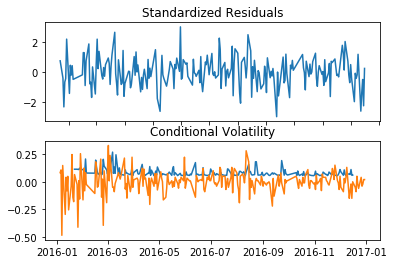

In [22]:
res_G.plot()
plt.plot(data)
plt.show()

In [23]:
forecasts = res_G.forecast()
print forecasts.mean[-1:].values[0]
print forecasts.variance[-1:].values[0]

[-0.01362123]
[ 0.00395096]
